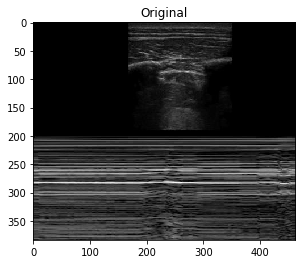

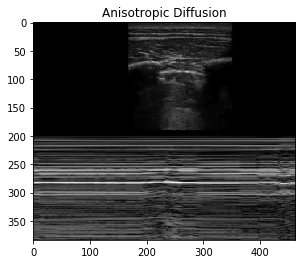

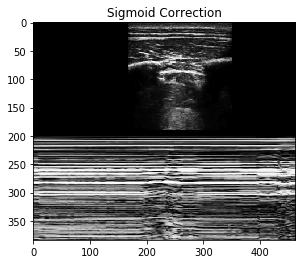

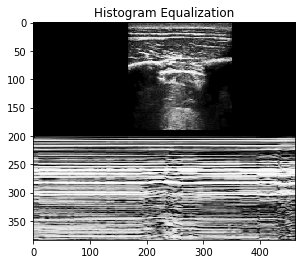

/home/rlee/venvp3/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


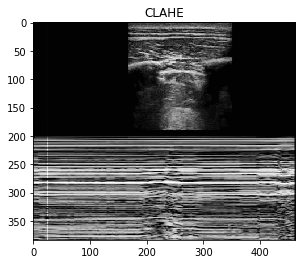

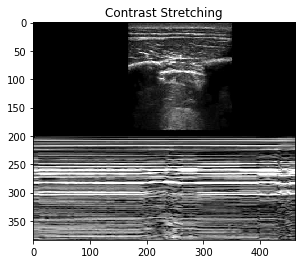

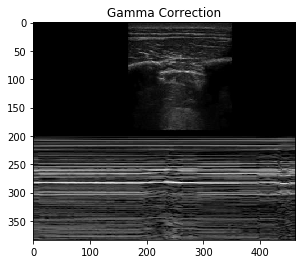

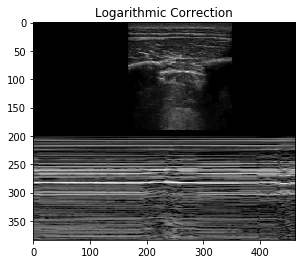

In [20]:
from __future__ import print_function
import numpy as np
import medpy
from PIL import Image

img = Image.open('/home/rlee/Documents/Pneumothorax/processed_mmode/IMG221.jpg')

pil_imgray = img.convert('LA')
img = np.array(list(pil_imgray.getdata(band=0)), float)

img.shape = (pil_imgray.size[1],pil_imgray.size[0])
img -= np.min(img)
img /= np.max(img)

from matplotlib import pyplot as plt
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.show()

# Anisotropic diffusion
from medpy.filter.smoothing import anisotropic_diffusion
img_f = anisotropic_diffusion(img)
plt.imshow(img_f, cmap='gray')
plt.title('Anisotropic Diffusion')
plt.show()

# Sigmoid correction
from skimage.exposure import adjust_sigmoid, equalize_adapthist, equalize_hist, rescale_intensity, adjust_gamma, adjust_log
img_as = adjust_sigmoid(img, cutoff = 0.25)
plt.imshow(img_as, cmap='gray')
plt.title('Sigmoid Correction')
plt.show()

# Histogram equalization
img_he = equalize_hist(img)
plt.imshow(img_he, cmap='gray')
plt.title('Histogram Equalization')
plt.show()

# CLAHE
img_clahe = equalize_adapthist(img)
plt.imshow(img_clahe, cmap='gray')
plt.title('CLAHE')
plt.show()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = rescale_intensity(img, in_range=(p2, p98))
plt.imshow(img_rescale, cmap='gray')
plt.title('Contrast Stretching')
plt.show()

# Gamma correction
img_ag = adjust_gamma(img, 1)#gain=10)
plt.imshow(img_ag, cmap='gray')
plt.title('Gamma Correction')
plt.show()

# Logarithmic correction
img_al = adjust_log(img, 1)#gain=10)
plt.imshow(img_al, cmap='gray')
plt.title('Logarithmic Correction')
plt.show()